# EDA (Exploratory Data Analysis)
## Analisis exploratorio de datos

### No se olviden de instalar estas librerias antes de ejecutar el primer bloque donde las importamos
#### ejecuten en la terminal:

* pip intall pandas
* pip intall numpy
* pip intall matplotlib
* pip intall seaborn

In [ ]:
# Importamos las librerías que creemos necesarias para el analisis
import pandas as pd
import numpy as np

# Tambien las librerias para la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Tambien establecemos un estilo de visualizacion ya definido y un tamaño de figura por defecto
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (12, 7)

print("Librerías importadas y configuración de visualización lista.")

Librerías importadas y configuración de visualización lista.


In [ ]:
# usamos la variable datos para definir la ruta en la que tenemos nuestros datos
datos = 'datos/BienestarIntegral.csv'

# ahora cargamos el archivo en un DataFrame de pandas
df_original = pd.read_csv(datos)
print("Archivo CSV cargado exitosamente.")


Archivo CSV cargado exitosamente.


In [ ]:
# Ver las dimensiones del DataFrame (filas, columnas)
print(f"En total tenemos {df_original.shape[0]} filas y {df_original.shape[1]} columnas.")

# mostramos las primeras 5 filas para ver un poco de los datos
print("\n Primeras 5 filas del dataset")
display(df_original.head())

En total tenemos 42 filas y 26 columnas.

 Primeras 5 filas del dataset


,Marca temporal,¿Cuál es tu rango de edad?,¿Cuál es tu nivel de estudios más alto completado?,¿En qué tipo de zona vives actualmente?,¿Posees un teléfono inteligente (Smartphone)?,"¿Con qué frecuencia utilizas aplicaciones en tu teléfono (redes sociales, mensajería, etc.)?","En una escala del 1 al 5, ¿Qué tan cómodo(a) te sientes aprendiendo a usar una nueva aplicación? (1=Muy incómodo, 5=Muy cómodo)",¿Cuál es tu principal medio para enterarte de iniciativas o eventos en tu comunidad?,¿Alguna vez has participado como voluntario(a) en alguna causa social?,¿Cuál sería tu principal motivación para ser voluntario(a)?,...,Inscripción Fácil: Poder registrarte como voluntario y apuntarte a una tarea con solo un par de clics.,"Horarios Flexibles: Poder filtrar tareas que se ajusten a tu disponibilidad de tiempo (ej. ""solo sábados por la mañana"").","Perfil de Habilidades: Poder crear un perfil indicando tus habilidades para que la app te sugiera tareas donde serías de más ayuda (ej. si sabes de contabilidad, te sugiere ayudar con las finanzas).",Transparencia Financiera: Tener acceso a reportes simples que muestren cómo se gasta el dinero de la cocina en alimentos.,Recordatorios y Comunicación Centralizada: Recibir recordatorios automáticos de tus tareas y comunicarte con los coordinadores a través de la misma app.,"Reconocimiento de tu Impacto: Recibir mensajes y estadísticas que muestren el impacto de tu ayuda (ej. ""Con tu participación esta semana, se alimentaron a 50 personas"").",Ver el Inventario de Alimentos: Poder ver qué alimentos se necesitan para decidir qué donar.,"Seguimiento de Donaciones: Si donas dinero o alimentos, poder ver en la app cuándo se recibieron y cómo se utilizaron.",Sistema de Gamificación: Ganar puntos o insignias por las horas de voluntariado completadas.,"Plataforma Unificada: En general, ¿qué tanto te motivaría una app que organice todo el proceso de voluntariado (encontrar, inscribirse, participar y ver el impacto) en un solo lugar?"
0,15/9/2025 19:57:31,18-25 años,Bachillerato / Preparatoria,No participo en ninguna,Sí,Varias veces al día,4,"Redes Sociales (Facebook, Instagram)","No, pero me gustaría","Contribuir a una causa en la que creo, Sentirm...",...,4,5,5,4,5,5,4,4,4,4
1,15/9/2025 21:50:06,18-25 años,Licenciatura o superior,Urbana,Sí,Varias veces al día,5,"Redes Sociales (Facebook, Instagram)","No, pero me gustaría","Sentirme útil y parte de la comunidad, Aprende...",...,3,3,3,3,3,3,2,3,3,3
2,22/9/2025 19:20:02,18-25 años,Bachillerato / Preparatoria,Suburbana,Sí,Varias veces al día,4,"Redes Sociales (Facebook, WhatsApp, Instagram ...","Sí, una o dos veces",Aprender nuevas habilidades,...,4,5,2,4,4,3,3,3,3,3
3,22/9/2025 20:09:58,18-25 años,Licenciatura o superior,Suburbana,Sí,Una vez al día,5,"Redes Sociales (Facebook, WhatsApp, Instagram ...","Sí, una o dos veces",Conocer gente nueva,...,3,3,3,3,5,5,5,5,4,5
4,23/9/2025 23:45:25,18-25 años,Bachillerato / Preparatoria,Urbana (Ciudad),Sí,Varias veces al día,4,"Redes Sociales (Facebook, WhatsApp, Instagram ...","No, pero me gustaría",Aprender nuevas habilidades,...,4,5,5,4,5,4,5,5,4,5


In [6]:
# resumen
print("\n Resumen técnico del DataFrame (info)")
df_original.info()


 Resumen técnico del DataFrame (info)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 26 columns):
 #   Column                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                    --------------  ----- 
 0   Marca temporal                                                                                                                                                                                            42 non-null     object
 1   ¿Cuál es tu rango de edad?                                                                                                                                         

In [9]:
# Creamos un diccionario para cambiar los nombres largos a nombres cortos y los podamos manejar mejor.
# La clave es el nombre original y el valor sera el nuevo nombre que usaremos.

mapeo_columnas = {
    'Marca temporal': 'marca_temporal',
    '¿Cuál es tu rango de edad? ': 'rango_edad',
    '  ¿Cuál es tu nivel de estudios más alto completado?  ': 'nivel_estudios',
    '¿En qué tipo de zona vives actualmente?  ': 'zona_vivienda',
    '  ¿Posees un teléfono inteligente (Smartphone)?  ': 'tiene_smartphone',
    '  ¿Con qué frecuencia utilizas aplicaciones en tu teléfono (redes sociales, mensajería, etc.)?  ': 'frecuencia_uso_apps',
    '  En una escala del 1 al 5, ¿Qué tan cómodo(a) te sientes aprendiendo a usar una nueva aplicación? (1=Muy incómodo, 5=Muy cómodo)  ': 'comodidad_nuevas_apps',
    '  ¿Cuál es tu principal medio para enterarte de iniciativas o eventos en tu comunidad?  ': 'medio_informacion',
    '  ¿Alguna vez has participado como voluntario(a) en alguna causa social?  ': 'experiencia_voluntariado',
    '  ¿Cuál sería tu principal motivación para ser voluntario(a)?  ': 'motivacion_voluntariado',
    '  ¿Cuál es la principal barrera que te impide ser voluntario(a) o hacerlo más seguido? (Elige la más importante)  ': 'barrera_voluntariado',
    '  Si decidieras ser voluntario(a), ¿Cuántas horas a la semana podrías dedicar?  ': 'horas_disponibles',
    '  En una escala del 1 al 5, ¿qué tan importante es para ti la flexibilidad de horarios al momento de elegir una actividad de voluntariado? (1=Nada importante, 5=Extremadamente importante)  ': 'importancia_flexibilidad',
    '  ¿Qué tipo de tareas te interesaría más realizar en una cocina comunitaria? (Elige hasta dos)  ': 'interes_tareas',
    '  En una escala del 1 al 5, ¿qué tan importante es para ti saber que los recursos (dinero y donaciones) de una organización se usan de forma transparente?  ': 'importancia_transparencia',
    'Ver Oportunidades Claras: Poder ver en la app una lista de tareas disponibles en la cocina comunitaria con descripciones claras.  ': 'feature_ver_tareas',
    'Inscripción Fácil: Poder registrarte como voluntario y apuntarte a una tarea con solo un par de clics.  ': 'feature_inscripcion_facil',
    'Horarios Flexibles: Poder filtrar tareas que se ajusten a tu disponibilidad de tiempo (ej. ""solo sábados por la mañana"").  ': 'feature_horarios_flexibles',
    'Perfil de Habilidades: Poder crear un perfil indicando tus habilidades para que la app te sugiera tareas donde serías de más ayuda (ej. si sabes de contabilidad, te sugiere ayudar con las finanzas).  ': 'feature_perfil_habilidades',
    'Transparencia Financiera: Tener acceso a reportes simples que muestren cómo se gasta el dinero de la cocina en alimentos. ': 'feature_transparencia_financiera',
    'Recordatorios y Comunicación Centralizada: Recibir recordatorios automáticos de tus tareas y comunicarte con los coordinadores a través de la misma app.  ': 'feature_recordatorios',
    'Reconocimiento de tu Impacto: Recibir mensajes y estadísticas que muestren el impacto de tu ayuda (ej. ""Con tu participación esta semana, se alimentaron a 50 personas"").  ': 'feature_reconocimiento_impacto',
    'Ver el Inventario de Alimentos: Poder ver qué alimentos se necesitan para decidir qué donar.': 'feature_ver_inventario',
    'Seguimiento de Donaciones: Si donas dinero o alimentos, poder ver en la app cuándo se recibieron y cómo se utilizaron.  ': 'feature_seguimiento_donaciones',
    'Sistema de Gamificación: Ganar puntos o insignias por las horas de voluntariado completadas.  ': 'feature_gamificacion',
    'Plataforma Unificada: En general, ¿qué tanto te motivaría una app que organice todo el proceso de voluntariado (encontrar, inscribirse, participar y ver el impacto) en un solo lugar? ': 'interes_plataforma_unificada'
}

# Creamos una copia del dataframe original para no modificarlo.
df = df_original.copy()

# Ahora aplicamos el renombrado
df.rename(columns=mapeo_columnas, inplace=True)

print("Columnas renombradas exitosamente. Nuevos nombres:")
print(df.columns.tolist())

Columnas renombradas exitosamente. Nuevos nombres:
['marca_temporal', 'rango_edad', 'nivel_estudios', 'zona_vivienda', 'tiene_smartphone', 'frecuencia_uso_apps', 'comodidad_nuevas_apps', 'medio_informacion', 'experiencia_voluntariado', 'motivacion_voluntariado', 'barrera_voluntariado', 'horas_disponibles', 'importancia_flexibilidad', 'interes_tareas', 'importancia_transparencia', 'feature_ver_tareas', 'feature_inscripcion_facil', 'Horarios Flexibles: Poder filtrar tareas que se ajusten a tu disponibilidad de tiempo (ej. "solo sábados por la mañana").  ', 'feature_perfil_habilidades', 'feature_transparencia_financiera', 'feature_recordatorios', 'Reconocimiento de tu Impacto: Recibir mensajes y estadísticas que muestren el impacto de tu ayuda (ej. "Con tu participación esta semana, se alimentaron a 50 personas").  ', 'feature_ver_inventario', 'feature_seguimiento_donaciones', 'feature_gamificacion', 'interes_plataforma_unificada']


#### Advertencia para aplicar bien los cambios de nombres
Para poder cambiar el nombre se debe respetar especificamente los nombres actuales, si tiene espacios hay que ponerlos tanto al inicio como al final ya que si no coincide exactamente no se aplicara el cambio de nombre.

Otra opcion es eliminar los espacios en blando del inicio y del fin de manera manual en el excel pero debemos correr todo nuevamente.

In [10]:
# Inspeccionamos los valores únicos de la columna 'zona_vivienda'
print("Valores originales en 'zona_vivienda':")
print(df['zona_vivienda'].unique())

# Estandarizamos los valores
df['zona_vivienda'] = df['zona_vivienda'].replace({
    'Urbana (Ciudad)': 'Urbana',
    'No participo en ninguna': 'No especificada' # 'No participo' no es un tipo de zona, lo reclasificamos
})

print("\nValores estandarizados en 'zona_vivienda':")
print(df['zona_vivienda'].unique())


# Hacemos lo mismo para 'medio_informacion'
print("\nValores originales en 'medio_informacion':")
print(df['medio_informacion'].unique())

df['medio_informacion'] = df['medio_informacion'].str.strip().replace({
    'Redes Sociales (Facebook, Instagram)': 'Redes Sociales',
    'Redes Sociales (Facebook, WhatsApp, Instagram etc.)': 'Redes Sociales'
})

print("\nValores estandarizados en 'medio_informacion':")
print(df['medio_informacion'].unique())

Valores originales en 'zona_vivienda':
['No participo en ninguna' 'Urbana' 'Suburbana' 'Urbana (Ciudad)' 'Rural']

Valores estandarizados en 'zona_vivienda':
['No especificada' 'Urbana' 'Suburbana' 'Rural']

Valores originales en 'medio_informacion':
['Redes Sociales (Facebook, Instagram)'
 'Redes Sociales (Facebook, WhatsApp, Instagram etc.)'
 'Carteles o anuncios físicos']

Valores estandarizados en 'medio_informacion':
['Redes Sociales' 'Carteles o anuncios físicos']


In [11]:
# buscamos valores nulos en el DataFrame
print("Conteo de valores nulos por columna")
print(df.isnull().sum())

# ahora convertimos las columnas de tipo 'object' (texto) a 'category' para optimizar memoria y rendimiento
columnas_categoricas = df.select_dtypes(include=['object']).columns

for col in columnas_categoricas:
    df[col] = df[col].astype('category')

# mostramos los cambios
print("\nResumen del DataFrame final")
df.info()

Conteo de valores nulos por columna
marca_temporal                                                                                                                                                                 0
rango_edad                                                                                                                                                                     0
nivel_estudios                                                                                                                                                                 0
zona_vivienda                                                                                                                                                                  0
tiene_smartphone                                                                                                                                                               0
frecuencia_uso_apps                                                            

# Análisis Descriptivo

### Análisis de Variables Demográficas

#### Rango de edad de los encuestados:

C:\Users\23120\AppData\Local\Temp\ipykernel_5456\3111479839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='rango_edad', order=df['rango_edad'].value_counts().index, palette='viridis')


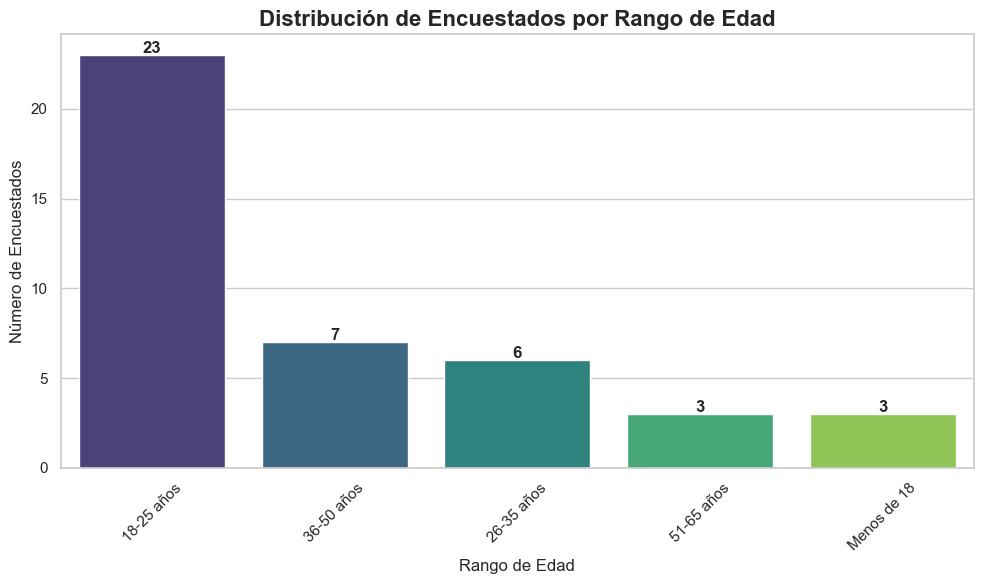

In [12]:
# Creamos la figura y los ejes para el gráfico
plt.figure(figsize=(10, 6))

# Creamos el gráfico de barras usando seaborn
ax = sns.countplot(data=df, x='rango_edad', order=df['rango_edad'].value_counts().index, palette='viridis')

# Añadimos etiquetas con el conteo exacto sobre cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

# Personalizamos el título y las etiquetas
plt.title('Distribución de Encuestados por Rango de Edad', fontsize=16, fontweight='bold')
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Número de Encuestados', fontsize=12)
plt.xticks(rotation=45) # Rotamos las etiquetas para mejor legibilidad
plt.tight_layout() # Ajusta el gráfico para que todo encaje bien
plt.show()

#### Nivel de estudio de los encuestados:

C:\Users\23120\AppData\Local\Temp\ipykernel_5456\3691670301.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='nivel_estudios', order=orden_estudios, palette='plasma')


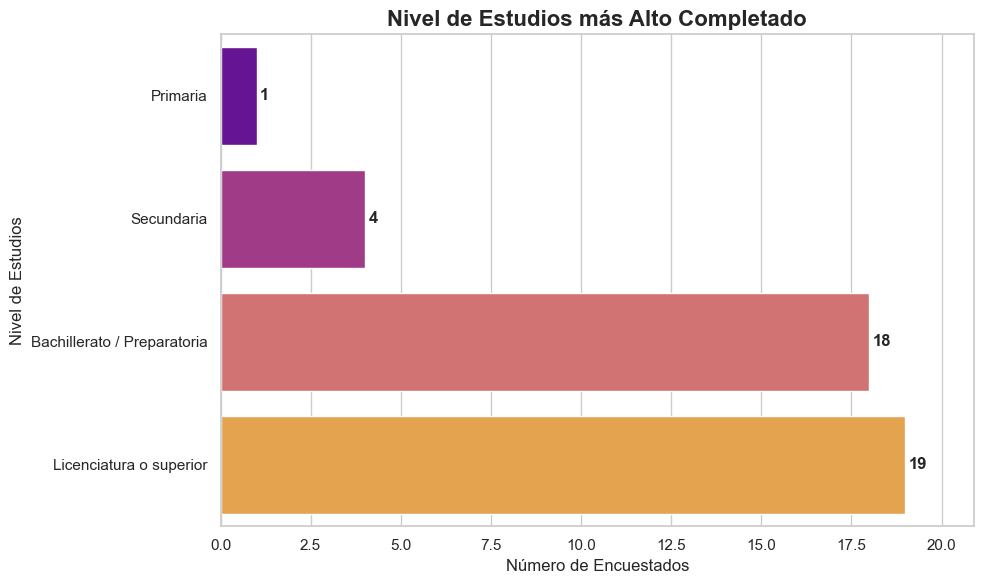

In [13]:
plt.figure(figsize=(10, 6))

# Definimos un orden lógico para la variable educativa
orden_estudios = ['Primaria', 'Secundaria', 'Bachillerato / Preparatoria', 'Licenciatura o superior']
ax = sns.countplot(data=df, y='nivel_estudios', order=orden_estudios, palette='plasma')

# Añadimos etiquetas con el conteo exacto al final de cada barra horizontal
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height()/2, f'{int(width)}', va='center', fontweight='bold')

plt.title('Nivel de Estudios más Alto Completado', fontsize=16, fontweight='bold')
plt.xlabel('Número de Encuestados', fontsize=12)
plt.ylabel('Nivel de Estudios', fontsize=12)
# Ajustamos el límite del eje X para dar espacio a las etiquetas
plt.xlim(0, df['nivel_estudios'].value_counts().max() * 1.1)
plt.tight_layout()
plt.show()

#### Experiencia como voluntarios

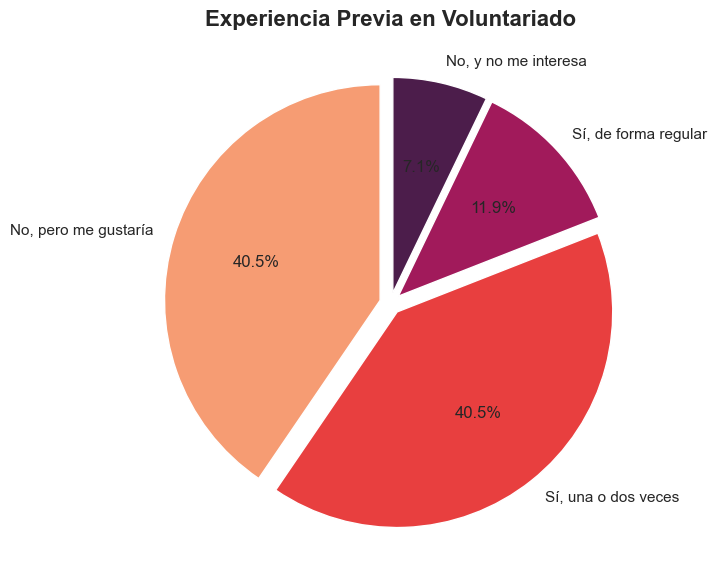

In [ ]:
# Calculamos los porcentajes
data = df['experiencia_voluntariado'].value_counts(normalize=True).mul(100).rename('porcentaje').reset_index()

plt.figure(figsize=(12, 7))

plt.pie(data['porcentaje'], 
        labels=data['experiencia_voluntariado'],
        autopct='%1.1f%%',
        startangle=90, 
        colors=sns.color_palette('rocket_r', n_colors=len(data)),
        explode=[0.05] * len(data))

plt.title('Experiencia Previa en Voluntariado', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.show()

#### Barreras y motivaciones:

C:\Users\23120\AppData\Local\Temp\ipykernel_5456\1700416327.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='barrera_voluntariado',


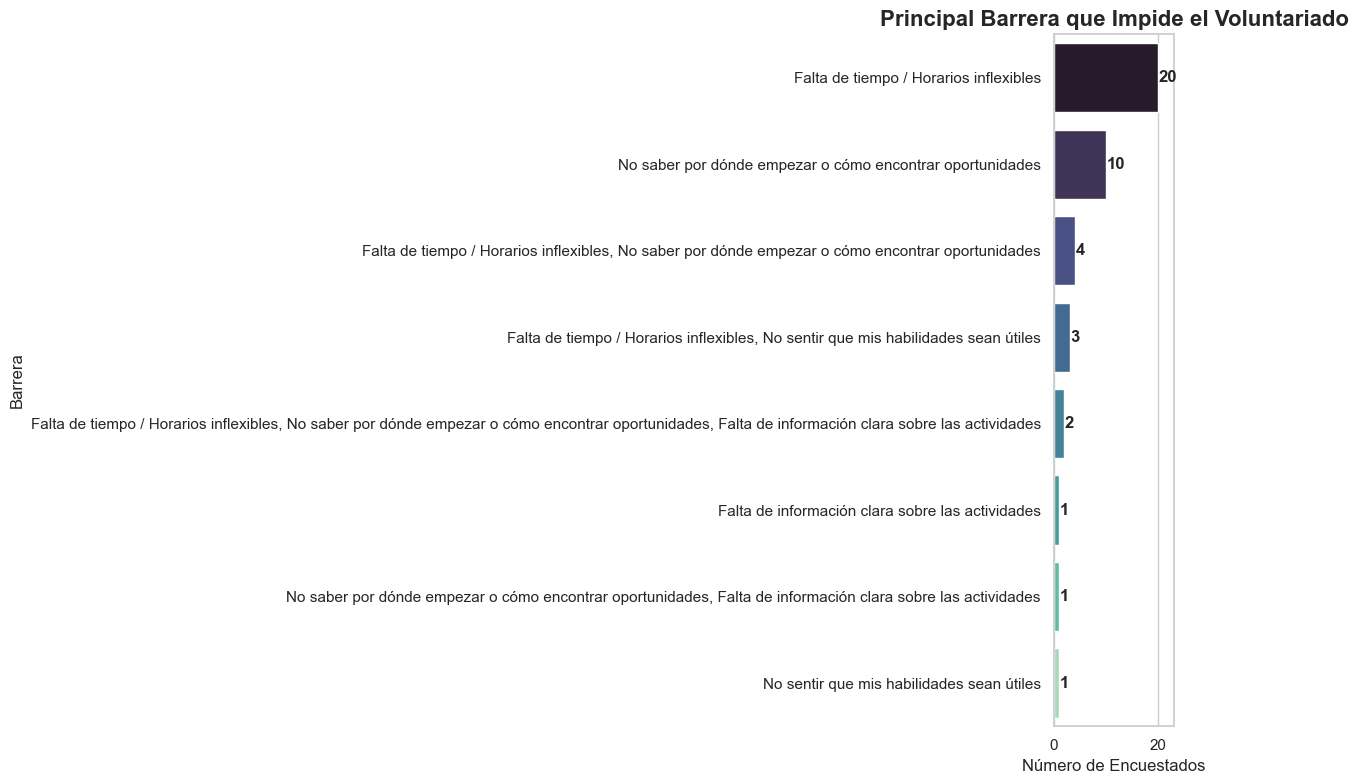

In [17]:
plt.figure(figsize=(12, 8))

# Usamos 'y' para la variable para tener barras horizontales, que son mejores para etiquetas largas
ax = sns.countplot(data=df, y='barrera_voluntariado', 
    order=df['barrera_voluntariado'].value_counts().index,
    palette='mako')

# Añadimos las etiquetas de conteo
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height()/2, f'{int(width)}', va='center', fontweight='bold')

plt.title('Principal Barrera que Impide el Voluntariado', fontsize=16, fontweight='bold')
plt.xlabel('Número de Encuestados', fontsize=12)
plt.ylabel('Barrera', fontsize=12)
plt.xlim(0, df['barrera_voluntariado'].value_counts().max() * 1.15)
plt.tight_layout()
plt.show()

# Análisis Exploratorio y Diagnóstico ("¿Cómo se relacionan los datos?" y "¿Por qué sucedió?")

C:\Users\23120\AppData\Local\Temp\ipykernel_5456\452433472.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rango_edad', y='comodidad_nuevas_apps', order=orden_edad, palette='coolwarm')


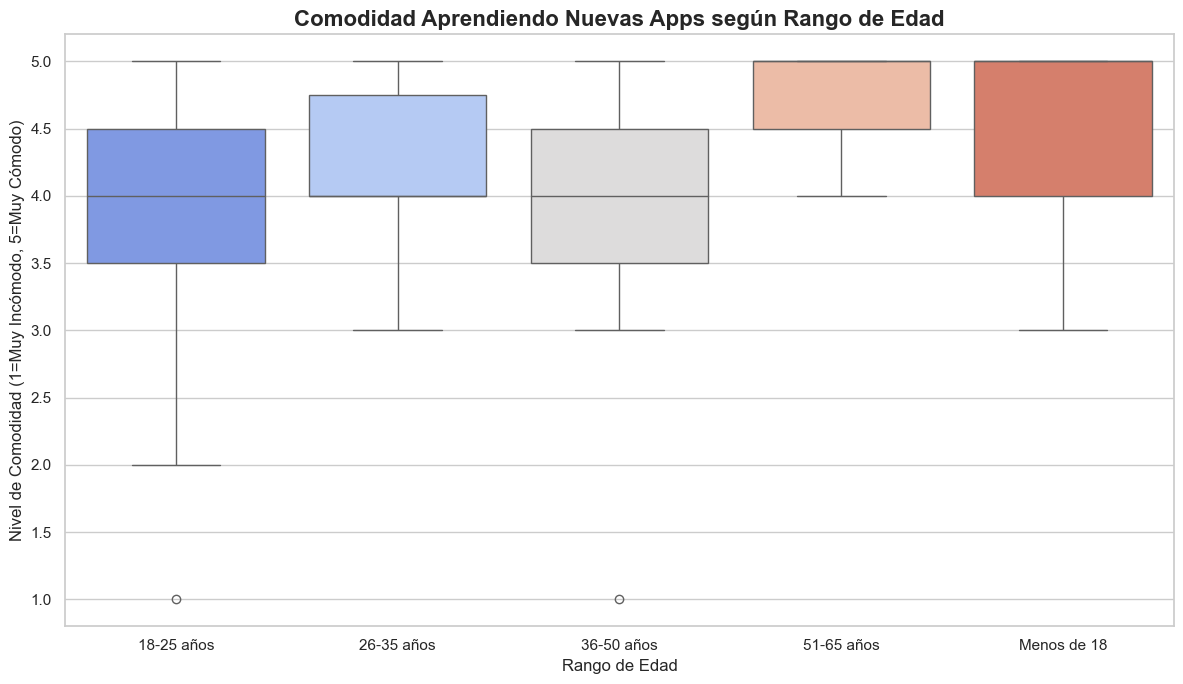

In [18]:
plt.figure(figsize=(12, 7))

# Definimos el orden de las edades para una visualización lógica
orden_edad = sorted(df['rango_edad'].unique())

# Creamos el boxplot
sns.boxplot(data=df, x='rango_edad', y='comodidad_nuevas_apps', order=orden_edad, palette='coolwarm')

plt.title('Comodidad Aprendiendo Nuevas Apps según Rango de Edad', fontsize=16, fontweight='bold')
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Nivel de Comodidad (1=Muy Incómodo, 5=Muy Cómodo)', fontsize=12)
plt.tight_layout()
plt.show()

# Relación entre Barrera Principal y Horas Disponibles para Voluntariado 

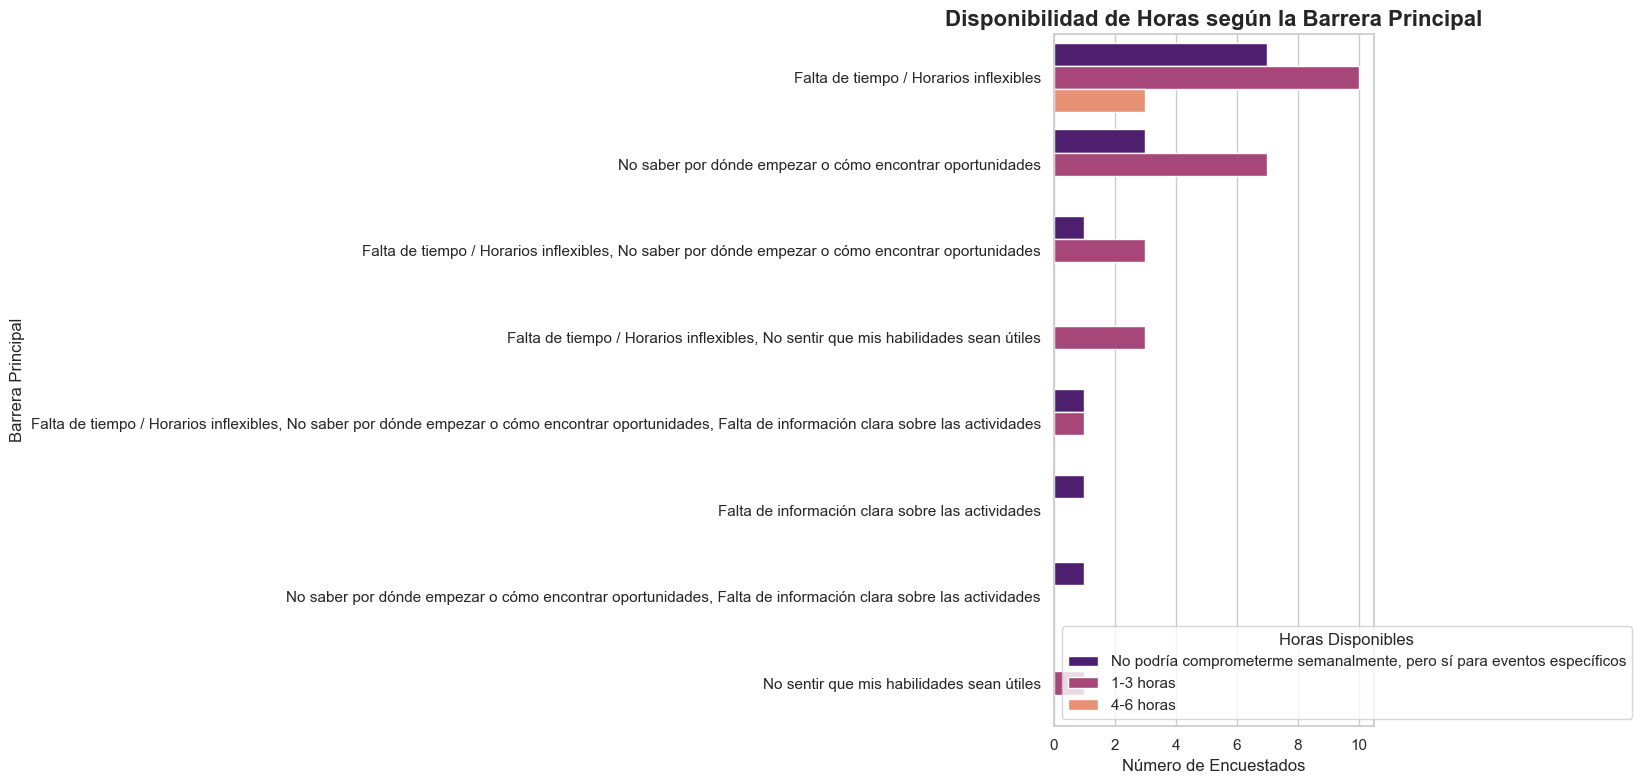

In [19]:
plt.figure(figsize=(14, 8))

# Ordenamos las horas de una forma lógica para el gráfico
orden_horas = [
    'No podría comprometerme semanalmente, pero sí para eventos específicos',
    '1-3 horas',
    '4-6 horas'
]

# Usamos catplot que es ideal para este tipo de visualización categórica anidada
sns.countplot(data=df, y='barrera_voluntariado', hue='horas_disponibles',
    order=df['barrera_voluntariado'].value_counts().index,
    hue_order=orden_horas,
    palette='magma')

plt.title('Disponibilidad de Horas según la Barrera Principal', fontsize=16, fontweight='bold')
plt.xlabel('Número de Encuestados', fontsize=12)
plt.ylabel('Barrera Principal', fontsize=12)
plt.legend(title='Horas Disponibles')
plt.tight_layout()
plt.show()

#### Que funcionalidades para la app son mas importantes

C:\Users\23120\AppData\Local\Temp\ipykernel_5456\3824644222.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=ranking_features, x='importancia', y='funcionalidad', palette='viridis_r')


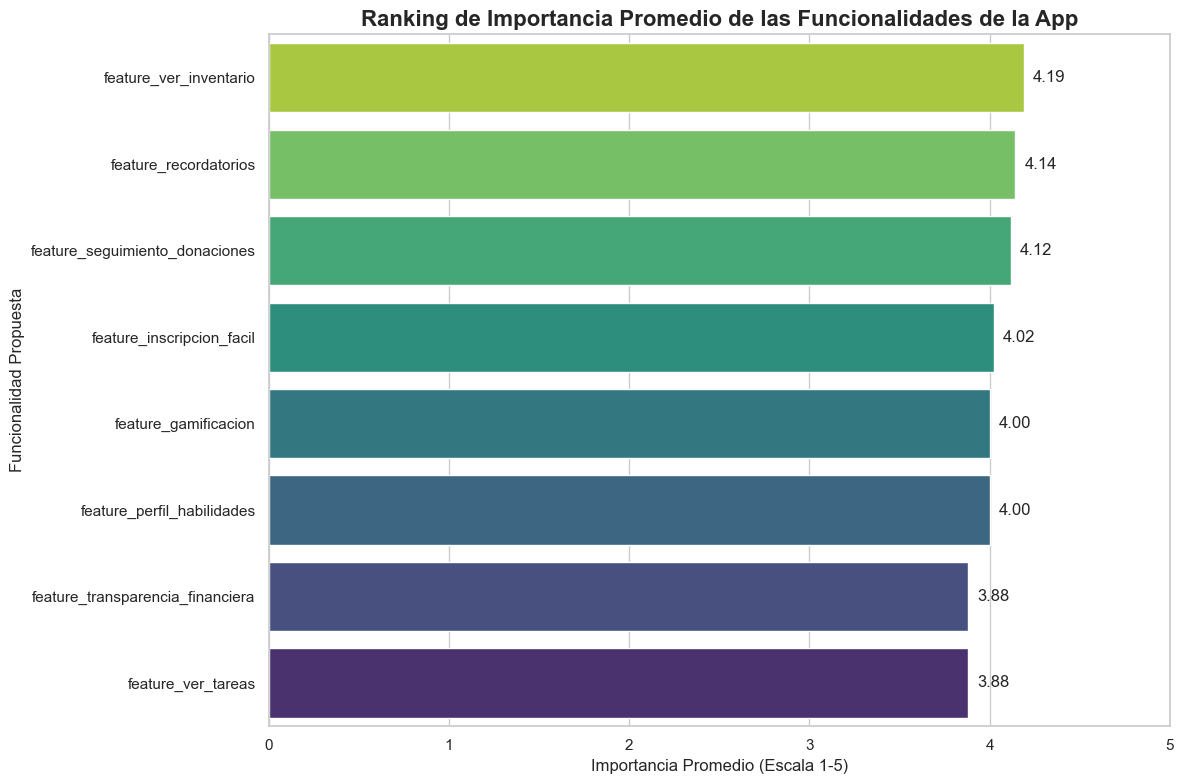

In [20]:
# 1. Seleccionamos solo las columnas de las funcionalidades
columnas_features = [col for col in df.columns if col.startswith('feature_')]

# 2. "Derretimos" (melt) el dataframe para pasar de un formato ancho a uno largo.
# Esto nos permite analizar todas las features juntas.
df_features = df.melt(id_vars=['rango_edad', 'experiencia_voluntariado'], 
                      value_vars=columnas_features, 
                      var_name='funcionalidad', 
                      value_name='importancia')

# 3. Calculamos la importancia promedio de cada funcionalidad
ranking_features = df_features.groupby('funcionalidad')['importancia'].mean().sort_values(ascending=False).reset_index()

# 4. Creamos la visualización
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=ranking_features, x='importancia', y='funcionalidad', palette='viridis_r')

plt.title('Ranking de Importancia Promedio de las Funcionalidades de la App', fontsize=16, fontweight='bold')
plt.xlabel('Importancia Promedio (Escala 1-5)', fontsize=12)
plt.ylabel('Funcionalidad Propuesta', fontsize=12)
plt.xlim(0, 5) # La escala es de 1 a 5

# Añadimos las etiquetas con el valor promedio
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.05, p.get_y() + p.get_height()/2, f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()

C:\Users\23120\AppData\Local\Temp\ipykernel_5456\1086561834.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ranking_segmentado = df_features.groupby(['funcionalidad', 'experiencia_voluntariado'])['importancia'].mean().unstack().reset_index()


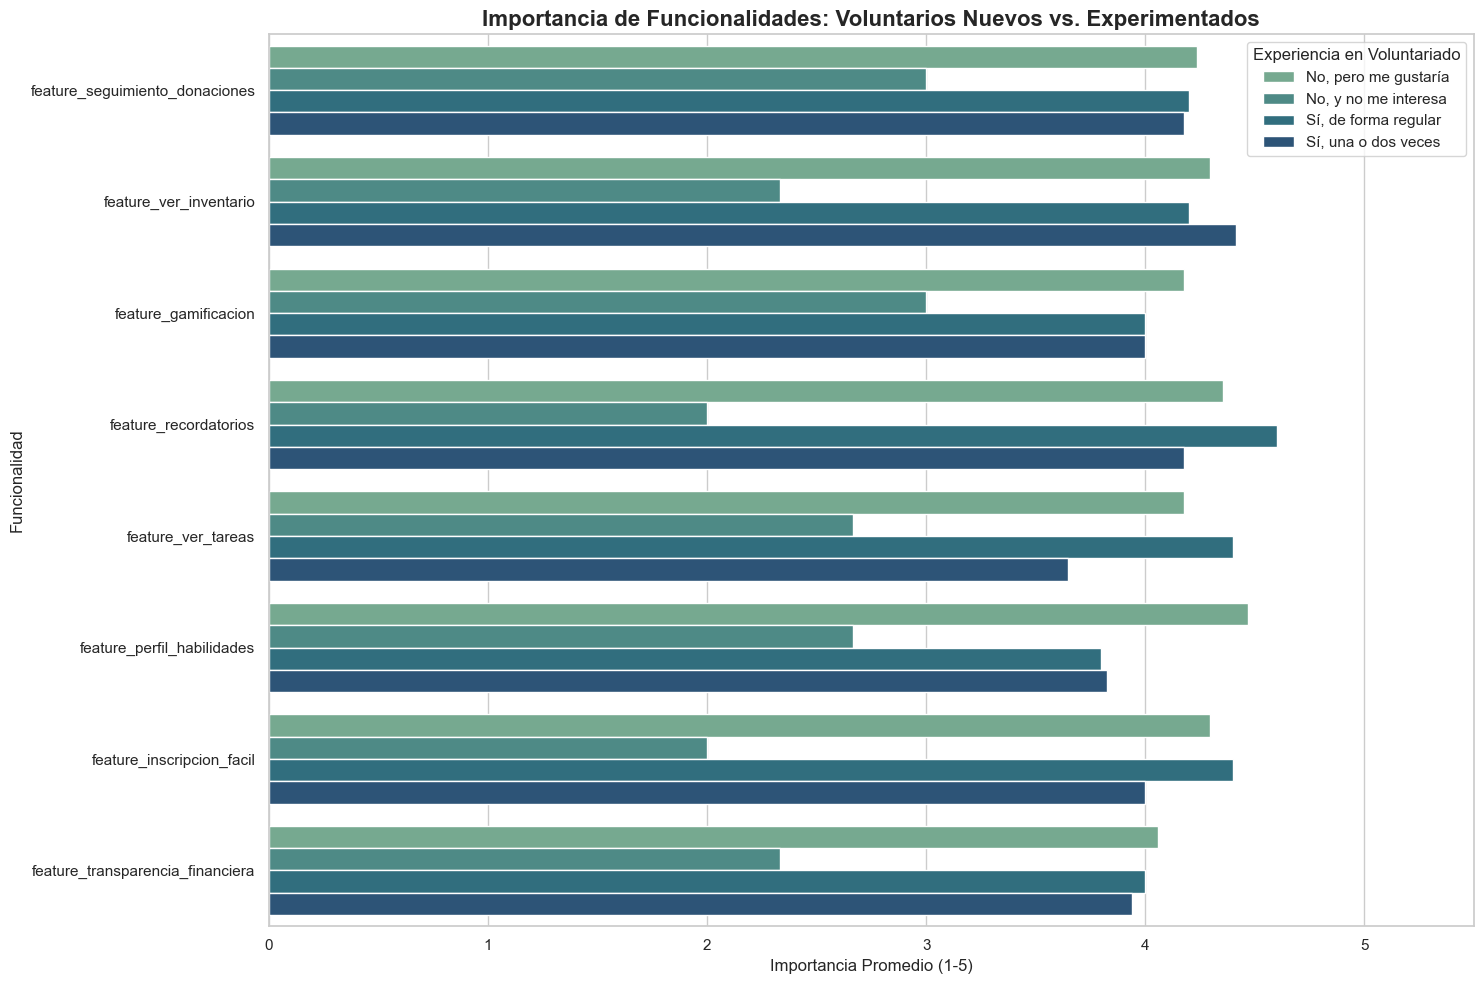

In [21]:
# --- Comparativa de Importancia de Funcionalidades por Experiencia ---

# Usaremos el dataframe 'df_features' que creamos en la celda anterior

# Calculamos la importancia promedio por funcionalidad Y por experiencia de voluntariado
ranking_segmentado = df_features.groupby(['funcionalidad', 'experiencia_voluntariado'])['importancia'].mean().unstack().reset_index()

# Ordenamos las funcionalidades por la importancia promedio general para que el gráfico sea más claro
ranking_segmentado['promedio_general'] = ranking_segmentado.mean(axis=1, numeric_only=True)
ranking_segmentado = ranking_segmentado.sort_values('promedio_general', ascending=False).drop(columns='promedio_general')

# "Derretimos" de nuevo para que sea fácil de graficar con seaborn
ranking_grafico = ranking_segmentado.melt(id_vars='funcionalidad', var_name='experiencia', value_name='importancia_promedio')


# Creamos la visualización
plt.figure(figsize=(15, 10))
sns.barplot(data=ranking_grafico, y='funcionalidad', x='importancia_promedio', hue='experiencia', palette='crest')

plt.title('Importancia de Funcionalidades: Voluntarios Nuevos vs. Experimentados', fontsize=16, fontweight='bold')
plt.ylabel('Funcionalidad', fontsize=12)
plt.xlabel('Importancia Promedio (1-5)', fontsize=12)
plt.legend(title='Experiencia en Voluntariado')
plt.xlim(0, 5.5) # Dejamos espacio para las etiquetas
plt.tight_layout()
plt.show()

# 5. Análisis Prescriptivo: Conclusiones y Plan de Acción

## 5.1. Resumen de Hallazgos Clave

A partir del análisis descriptivo y diagnóstico, hemos extraído varios insights fundamentales sobre la población encuestada y sus actitudes hacia el voluntariado y la tecnología:

1.  **Perfil Dominante: Joven, Educado y Conectado.** La mayoría de los encuestados se encuentra en el rango de **18-25 años**, posee estudios de **Licenciatura o Bachillerato** y utiliza aplicaciones móviles varias veces al día. Este grupo se siente, en general, muy cómodo aprendiendo a usar nueva tecnología (como se vio en el boxplot de edad vs. comodidad).

2.  **Alta Disposición al Voluntariado, Poca Experiencia.** Existe una gran oportunidad de captación: un porcentaje significativo de la muestra **nunca ha participado como voluntario pero le gustaría hacerlo**. Esto indica un mercado latente de ayuda que no ha sido activado.

3.  **La Barrera Principal es la Gestión, no la Falta de Ganas.** La **"Falta de tiempo / Horarios inflexibles"** y **"No saber por dónde empezar"** son las barreras más citadas. Sin embargo, el análisis cruzado reveló que muchos de los que citan la falta de tiempo están dispuestos a participar en **eventos específicos**. El problema no es la falta total de tiempo, sino la dificultad para encontrar oportunidades que se ajusten a horarios complejos.

4.  **La Claridad y la Flexibilidad son las Funcionalidades "Reinas".** El ranking de funcionalidades de la app es inequívoco. Las características más valoradas son aquellas que resuelven las barreras principales: **"Horarios Flexibles"**, **"Inscripción Fácil"** y **"Ver Oportunidades Claras"**. Estas no son opcionales, son el núcleo de la propuesta de valor.

5.  **La Transparencia Genera Confianza Universal.** Funcionalidades como **"Transparencia Financiera"** y **"Seguimiento de Donaciones"** reciben una alta valoración de forma consistente en todos los segmentos (nuevos y experimentados). Esto sugiere que la confianza es un pilar fundamental para la participación.

## 5.2. Recomendaciones Estratégicas (Plan de Acción)

Basado en los hallazgos anteriores, se prescribe el siguiente plan de acción para maximizar el impacto y la adopción de la plataforma de voluntariado.

### Recomendación 1: Enfocar el Desarrollo del Producto en la "Tríada de la Conveniencia"

El desarrollo inicial de la app (MVP - Producto Mínimo Viable) debe centrarse obsesivamente en las tres funcionalidades mejor valoradas, ya que atacan directamente las barreras más grandes:

*   **Prioridad #1: Filtro de Horarios Flexibles.** Esta es la característica más crítica. Debe permitir a los usuarios filtrar oportunidades por día, hora, y tipo de compromiso (p. ej., "solo una vez", "semanal"). *Evidencia: Gráfico de Barreras y Gráfico de Ranking de Funcionalidades.*
*   **Prioridad #2: Proceso de Inscripción de "Un Clic".** La barrera "No saber por dónde empezar" se combate con simplicidad. El proceso desde ver una tarea hasta estar inscrito debe ser de no más de dos o tres toques. *Evidencia: Gráfico de Ranking de Funcionalidades.*
*   **Prioridad #3: Listado Claro y Detallado de Tareas.** Cada oportunidad debe tener una descripción concisa: qué se hará, qué se necesita y cuál es el impacto esperado. Esto reduce la incertidumbre. *Evidencia: Gráfico de Ranking de Funcionalidades.*

### Recomendación 2: Implementar una Estrategia de Marketing Segmentada

No debemos comunicarnos de la misma manera con todos.

*   **Para el Segmento Joven (18-25) y Nuevos Voluntarios:** El mensaje debe centrarse en la **simplicidad y el desarrollo de habilidades**. Frases como *"Ayudar nunca fue tan fácil"* o *"Gana experiencia mientras marcas la diferencia"* resonarán con este grupo. El canal principal deben ser las **Redes Sociales**. *Evidencia: Gráfico de Edad y Gráfico de Motivaciones.*
*   **Para el Segmento de Voluntarios con Experiencia:** La comunicación debe enfocarse en el **impacto y la eficiencia**. Ellos ya saben que quieren ayudar; la app debe mostrarles cómo su ayuda puede ser más efectiva y reconocida. Funcionalidades como **"Reconocimiento del Impacto"** son clave para este grupo. *Evidencia: Gráfico Comparativo de Funcionalidades por Experiencia.*

### Recomendación 3: Construir una Base de Confianza a través de la Transparencia

Desde el día uno, la plataforma debe integrar funcionalidades de transparencia.

*   **Dashboard de Impacto:** Mostrar en tiempo real métricas simples como "Comidas servidas esta semana" o "Donaciones recibidas".
*   **Reportes de Gastos:** Publicar reportes sencillos y visuales sobre cómo se utilizan los recursos. Esto no es solo una funcionalidad, es una ventaja competitiva que atraerá a donantes y voluntarios que valoran la integridad. *Evidencia: Alta valoración universal de las funcionalidades de transparencia.*

### Recomendación 4: Priorizar el Voluntariado Esporádico sobre el Compromiso a Largo Plazo

Dado que la "falta de tiempo" es la principal barrera y muchos prefieren participar en "eventos específicos", la estrategia de captación inicial debe centrarse en oportunidades de bajo compromiso.

*   **Promocionar "Micro-voluntariado":** Tareas de 1 a 3 horas que se puedan realizar de forma puntual. Esto reduce la fricción inicial y permite que los nuevos voluntarios tengan una primera experiencia positiva sin sentirse abrumados. *Evidencia: Gráfico de Barreras vs. Horas Disponibles.*